In [130]:
import numpy as np
import copy

## 1. 연습문제 3.2

In [131]:
def clgs(A):
    m, n = A.shape
    V = copy.deepcopy(A)
    Q = np.eye(m, n)
    R = np.zeros((n, n))
    for j in range(n):
        for i in range(j-1):
            R[i, j] = np.dot(Q[:, i].T, A[:, j])
            V[:, j] = V[:, j] - R[i, j]*Q[:, i]
        R[j, j] = np.linalg.norm(V[:, j])
        Q[:, j] = V[:, j] / R[j, j]

    return Q, R

In [132]:
def mgs(A):
    m, n = A.shape
    Q = copy.deepcopy(A)
    R = np.zeros((n, n))
    for i in range(n-1):
        R[i, i] = np.linalg.norm(Q[:, i])
        Q[:, i] = Q[:, i] / R[i, i]
        R[i, i+1:n] = np.dot(Q[:, i].T, Q[:, i+1:n])
        Q[:, i+1:n] = Q[:, i+1:n] - np.outer(Q[:, i], R[i, i+1:n])
    R[n-1, n-1] = np.linalg.norm(Q[:, n-1])
    Q[:, n-1] = Q[:, n-1] / R[n-1, n-1]

    return Q, R

In [150]:
def qrhouse(A):
    m, n = A.shape
    R = copy.deepcopy(A)
    V = np.zeros((m, n))
    for k in range(min(m-1, n)):
        x = R[k:m, k]
        v = x + (np.sign(x[0]) * np.linalg.norm(x) * np.eye(len(x), 1)).flatten()
        V[k:m, k] = v
        R[k:m, k:n] = R[k:m, k:n] - np.outer(2*v[:, None], (np.dot(v, R[k:m, k:n]))) / np.dot(v, v[:, None])
    R = np.triu(R[:n, :n])

    return V, R

In [151]:
def formQ(V):
    m, n = V.shape
    Q = np.eye(m)
    for j in reversed(range(min(m-1, n))):
        v = V[:, j]
        Q = Q - np.dot((2*v), np.dot(v.T, Q)) / np.dot(v.T, v)

    return Q

### (a)

In [152]:
U, X = qrhouse(np.random.randn(80, 80))
V, X = qrhouse(np.random.randn(80, 80))
J = np.array(range(1, 81))
S = np.diag(np.power(2., -J))
A = U.dot(S).dot(V)
Qc, Rc = clgs(A)
Qm, Rm = mgs(A)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [153]:
print(Qc, '\n')
print(Rc, '\n')
print(Qm, '\n')
print(Rm, '\n')

[[-7.79052033e-01  0.00000000e+00  1.62800642e-02 ...  2.10866999e-02
   1.45016959e-03             nan]
 [-1.15679368e-02 -7.32538201e-01  2.41738350e-04 ...  3.59252627e-02
   6.87435200e-02             nan]
 [-4.62297858e-02 -1.48184068e-01  7.64124620e-01 ...  7.64045859e-02
  -2.84523613e-02             nan]
 ...
 [ 7.02525225e-03  5.96271680e-02 -2.40810849e-02 ...  3.81698081e-01
  -1.26440120e-01             nan]
 [-4.91213724e-02 -3.69867516e-02 -7.23879272e-02 ...  1.45220112e-01
   1.95118556e-01             nan]
 [-3.22861435e-02  9.29580558e-02 -1.05913322e-02 ... -2.13187365e-01
   3.97558962e-01             nan]] 

[[ 6.34697641e+01  0.00000000e+00  3.48952503e-01 ... -5.85708633e-25
  -2.61980575e-25  0.00000000e+00]
 [ 0.00000000e+00  3.35342998e+01  0.00000000e+00 ...  6.42028958e-25
   1.27501880e-25  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.66984696e+01 ... -1.70799329e-24
  -2.83635841e-25  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000

In [154]:
np.array_equal(np.nan_to_num(Qc), np.nan_to_num(Qm))

False

In [155]:
np.array_equal(Rc, Rm)

False

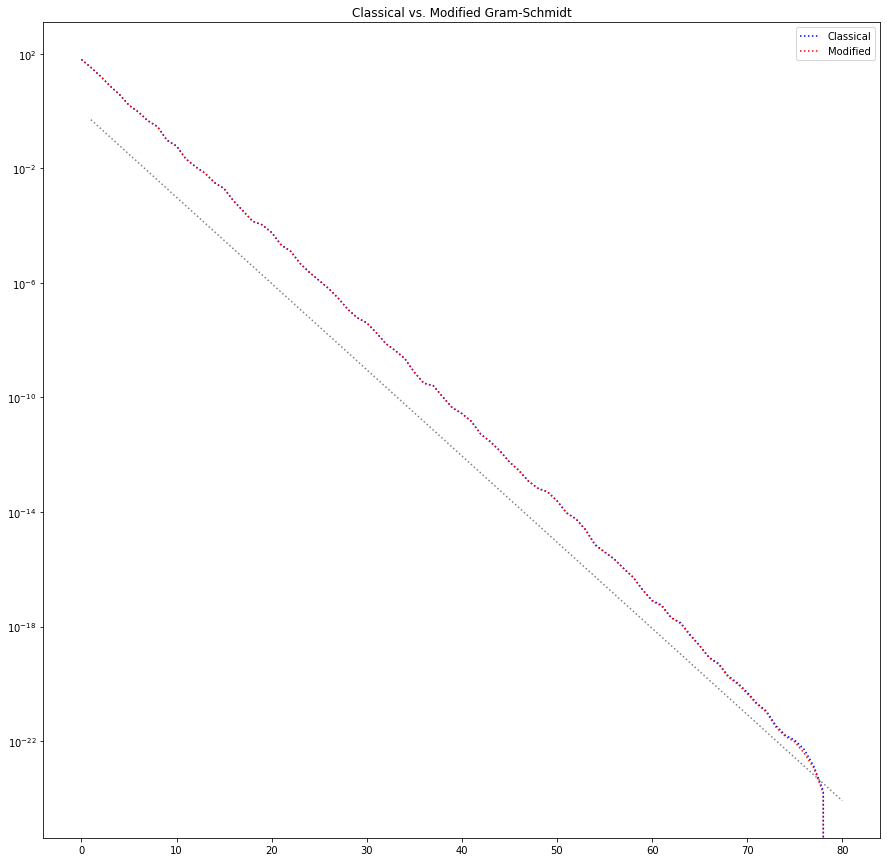

In [156]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.title('Classical vs. Modified Gram-Schmidt')
plt.plot(J, np.power(2., -J), ls=':', c='gray')
plt.semilogy(np.diag(Rc), ls=':', c='blue', label='Classical')
plt.semilogy(np.diag(Rm), ls=':', c='red', label='Modified')
plt.legend(loc=1)

plt.show()

- 수업 시간에 배운 것과 달리 Classical Method 또한 비슷하게 stable한 결과를 보여줌...

In [195]:
U, X = qrhouse(np.random.randn(500, 500))
V, X = qrhouse(np.random.randn(500, 500))
J = np.array(range(1, 251))
S = np.diag(np.power(2., -J))
A = U.dot(S).dot(V)
Qc, Rc = clgs(A)
Qm, Rm = mgs(A)

ValueError: ignored

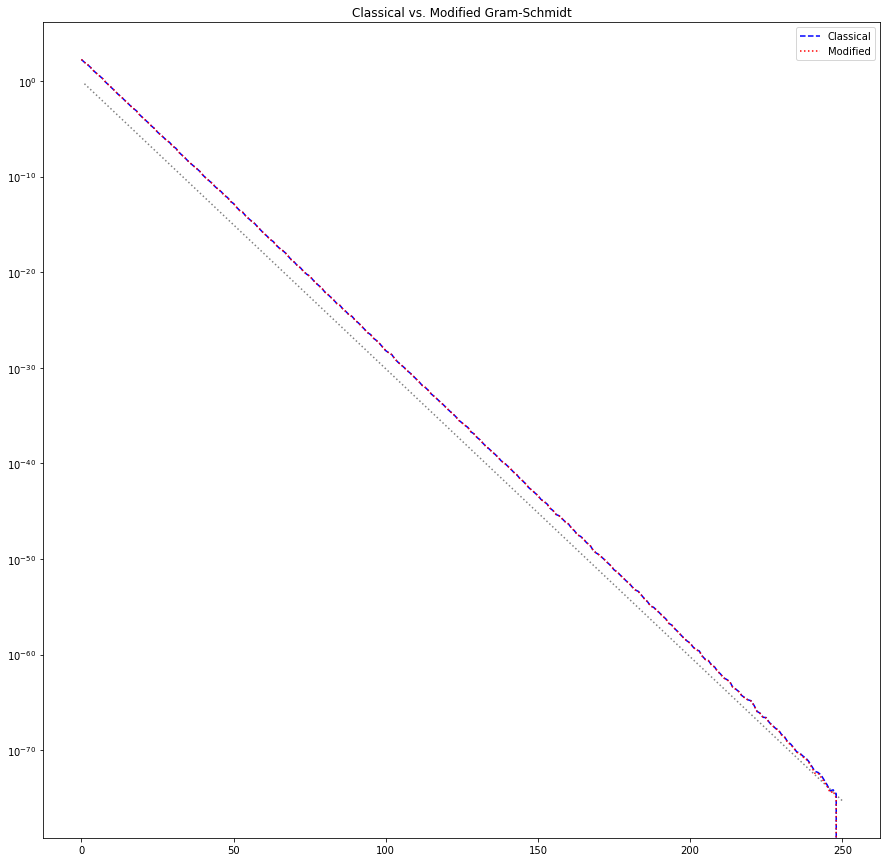

In [194]:
plt.figure(figsize=(15, 15))
plt.title('Classical vs. Modified Gram-Schmidt')
plt.plot(J, np.power(2., -J), ls=':', c='gray')
plt.semilogy(np.diag(Rc), ls='--', c='blue', label='Classical')
plt.semilogy(np.diag(Rm), ls=':', c='red', label='Modified')
plt.legend(loc=1)

plt.show()

### (b)

In [157]:
A = np.array([[.70000, .70711], [.70001, .70711]])
Qm, Rm = mgs(A)
V, R = qrhouse(A)
Q = formQ(V)
print(np.linalg.norm(np.dot(Q.T, Q - np.eye(2))))
print(np.linalg.norm(np.dot(Qm.T, Qm - np.eye(2))))

12.0
1.9999999999755893


In [158]:
print(Q)
print()
print(Qm)

[[-1. -2.]
 [-2. -1.]]

[[ 0.70710173  0.70711183]
 [ 0.70711183 -0.70710173]]


- modified method가 더 stable함

## 2. 연습문제 3.3

In [159]:
def givens(m, i, k, theta):
    G = np.eye(m)
    
    G[i, i] = G[k, k] = np.cos(theta)
    G[i, k] = np.sin(theta)
    G[k, i] = -np.sin(theta)

    return G

In [169]:
def givens_decomp(A):
    m, n = A.shape
    Q = np.eye(m)
    R = copy.deepcopy(A)
    for j in range(n):
        for i in reversed(range(j+1, m)):
            x = R[:,j].flatten()
            x_prime = copy.deepcopy(x)
            x_prime[i] = 0
            theta = np.arccos(np.dot(x, x_prime) / (np.linalg.norm(x) * np.linalg.norm(x_prime)))
            G = givens(m, i, j, theta)
            R = np.dot(G, R)
            Q = np.dot(Q, G.T)
    return Q, R

In [161]:
A = np.random.randn(4, 3) * 5

In [162]:
clgs(A)

(array([[ 0.59145072, -0.34055575, -0.01758814],
        [ 0.24865269,  0.25677468, -0.94611055],
        [-0.12913181,  0.4052099 , -0.09797311],
        [-0.75609712, -0.8086368 , -0.30816677]]),
 array([[ 9.27647492,  0.        , -2.73978501],
        [ 0.        ,  8.12462139,  0.        ],
        [ 0.        ,  0.        ,  6.41575398]]))

In [163]:
mgs(A)

(array([[ 0.59145072, -0.65046441, -0.03729665],
        [ 0.24865269,  0.16757985, -0.94146893],
        [-0.12913181,  0.50686763, -0.08266666],
        [-0.75609712, -0.54027609, -0.32467128]]),
 array([[ 9.27647492,  3.42459486, -2.73978501],
        [ 0.        ,  7.36760632, -0.19422327],
        [ 0.        ,  0.        ,  6.41281346]]))

In [164]:
qrhouse(A)

(array([[14.76305271,  0.        ,  0.        ],
        [ 2.30662046,  9.35104122,  0.        ],
        [-1.19788802,  3.34554409,  8.00994875],
        [-7.01391599, -6.25739111, -6.21074354]]),
 array([[-9.27647492, -3.42459486,  2.73978501],
        [ 0.        , -7.36760632,  0.19422327],
        [ 0.        ,  0.        , -6.41281346]]))

In [170]:
Q1, R1 = givens_decomp(A)
Q2, R2 = np.linalg.qr(A)

In [171]:
R1

array([[ 8.11876302,  2.10139116,  0.55497778],
       [ 2.78698543,  4.30880926, -2.68991056],
       [-2.20438247,  4.59547729,  4.53426314],
       [ 2.74081814,  4.68074558, -4.53488253]])

In [172]:
print(Q1)

[[ 0.62859722 -0.47994133 -0.59311432  0.15078876]
 [-0.24865269  0.53336806 -0.54277907  0.59923387]
 [-0.12507613 -0.4658855   0.43738002  0.75895018]
 [-0.72621851 -0.51780839 -0.40287095 -0.20536831]]


In [173]:
print(Q2)

[[-0.59145072  0.65046441  0.03729665]
 [-0.24865269 -0.16757985  0.94146893]
 [ 0.12913181 -0.50686763  0.08266666]
 [ 0.75609712  0.54027609  0.32467128]]


## 3. 연습문제 4.3

In [24]:
def random(m):
    return np.random.randn(m, m) / np.sqrt(m)

### (a)

In [27]:
grid = np.power(2., np.arange(3, 12))

In [ ]:
from tqdm import tqdm_notebook

fig = plt.figure(figsize=[10, 10])

for m in tqdm_notebook(grid):
    rand_mat = random(np.int64(m))
    plt.scatter([m], [np.linalg.eig(rand_mat)[0][0]])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


### (b)

In [5]:
fig = plt.figure(figsize=[10, 10])

for m in tqdm_notebook(grid):
    rand_mat = random(int(m))
    plt.scatter([m], [np.linalg.norm(rand_mat))
plt.show()

SyntaxError: ignored

## 4. 연습문제 4.6